# Arbaro demo scene

Notebook: Lukas Winiwarter, 2022

This demo scene showcases two highly detailed tree models scanned from two TLS scanning positions. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

## Survey
Let us look at the XML files in the simulation. First, we investigate the **survey** XML file, `tls_arbaro_demo.xml`:

In [2]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\demo\tls_arbaro_demo.xml'), language='XML')

<document>
	
    <scannerSettings id="profile1" active="true" pulseFreq_hz="100000" scanFreq_hz="120" scanAngle_deg="100" headRotatePerSec_deg="10.0" />
    <survey name="arbaro_demo_tls" scene="data/scenes/demo/arbaro_demo.xml#arbaro_demo" platform="data/platforms.xml#tripod" scanner="data/scanners_tls.xml#riegl_vz400">
        <FWFSettings binSize_ns="0.2" beamSampleQuality="3" />
        <leg>
            <platformSettings x="1.0" y="25.5" onGround="true" />
            <scannerSettings template="profile1" verticalAngleMin_deg="-40.0" verticalAngleMax_deg="60" headRotateStart_deg="100" headRotateStop_deg="225" trajectoryTimeInterval_s="1.0" />
        </leg>
        <leg>
            <platformSettings x="-4.0" y="-2.5" onGround="true" />
            <scannerSettings template="profile1" verticalAngleMin_deg="-40.0" verticalAngleMax_deg="60" headRotateStart_deg="-45" headRotateStop_deg="45" trajectoryTimeInterval_s="1.0" />
        </leg>
    </survey>
</document>

We can see that there are two `leg` elements corresponding to the two scan positions (SPs) at `(1.0, 25.5)` and `(-4.0, -2.5)`, respectively. Both of them have individual horizontal fields of view (SP1 from `100` to `255` deg, SP2 from `-45` to `45` deg).
Furthermore, we see that the `tripod` platform in `data\platforms.xml` is referenced, so let's look at that next:

## Platform

In [3]:
Code(display_xml(r'data\platforms.xml', 'tripod'))

<platform id="tripod" name="TLS Tripod" type="static" drag="0">
		<scannerMount x="0" y="0" z="1.5">
		</scannerMount>
		
	</platform>

This is a very simple `static` type platform. Note the `scannerMount` parameter, indicating an elevation of `1.5` meters above the ground.

## Scanner
Now let's look at the scanner that is placed on this platform, the `riegl_vz400` defined in `data\scanners_tls.xml` (as shown in the survey XML):

In [4]:
Code(display_xml(r'data\scanners_tls.xml', 'riegl_vz400'))

<scanner id="riegl_vz400" name="RIEGL VZ-400" accuracy_m="0.005" beamDivergence_rad="0.0003" headRotatePerSecMax_deg="60" optics="rotating" pulseFreqs_Hz="100000,300000" pulseLength_ns="5" rangeMin_m="1.5" scanAngleMax_deg="120" scanAngleEffectiveMax_deg="50" scanFreqMin_Hz="3" scanFreqMax_Hz="120">
		
		<FWFSettings beamSampleQuality="3" />	
		<beamOrigin x="0" y="0" z="0.2">
			<rot axis="y" angle_deg="0" />
			<rot axis="z" angle_deg="0" />
			<rot axis="x" angle_deg="0" />
		</beamOrigin>
		<headRotateAxis x="0" y="0" z="1" />
		
	</scanner>

Here we see a lot of scanner-specific settings, including the minium range (`rangeMin_m`), the maximum scan angle (`scanAngleMax_deg`) that defines the polygonal mirror deflector, the resulting effective vertical field of view (`scanAngleEffectiveMax_deg`), and more. Additionally, we see the `beamOrigin` is set to `0.2` meters in `z`. Adding this to the platform offset, we arrive at a height of **1.7 meters above ground** for the laser beam origin.

## Scene

Finally, let us take a look at the scene, `arbaro_demo` in `data\scenes\demo\arbaro_demo.xml`:

In [5]:
Code(display_xml(r'data\scenes\demo\arbaro_demo.xml', 'arbaro_demo'))

<scene id="arbaro_demo" name="Arbaro Demo">
        <part id="0">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="100" />
            </filter>
        </part>
        <part id="1">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/black_tupelo_low.obj" />
                <param type="string" key="up" value="y" />
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="0;15;0" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
        <part id="2">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/arbaro/sassafras_low.obj" />
                <param type="string" key="up" value="y" />
            </filter>
            <filter type="translate">
                <param type="vec3" key="offset" value="-10;15;0" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
    </scene>

Here we see three objects (with `id` s 0, 1, and 2). The first object is a basic plane (`groundplane`) and acts as a baseplate for this simulation. We then add two different tree models (that were generated with the [Arbaro Tree Generator](https://arbaro.sourceforge.net/)) at the locations `(0, 15, 0)` and `(-10, 15, 0)`. We additionally scale the trees by a factor of `0.5` (and the groundplane by a factor of `100` to ensure it covers the entire scene).

## Executing the Simulation
Now, we are ready to run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [6]:
!"run/helios.exe" data/surveys/demo/tls_arbaro_demo.xml

HELIOS++ VERSION 1.1.1

CWD: "D:\helios"
seed: AUTO
surveyPath: "data/surveys/demo/tls_arbaro_demo.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: tls_arbaro_demo.xml
xmlDocFilePath: data/surveys/demo
xmlDocFilename: scanners_tls.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Using default value for attribute 'wavelength_nm' : 1064
Scanner: riegl_vz400
Device[0]: riegl_vz400
	Average Power: 4 W

## The results

Now let's find the output files and display a (2D) plot. For a 3D impression, we suggest using external software such as [CloudCompare](https://cloudcompare.org/).

Loading points from D:\helios\output\arbaro_demo_tls\2023-01-10_13-22-46


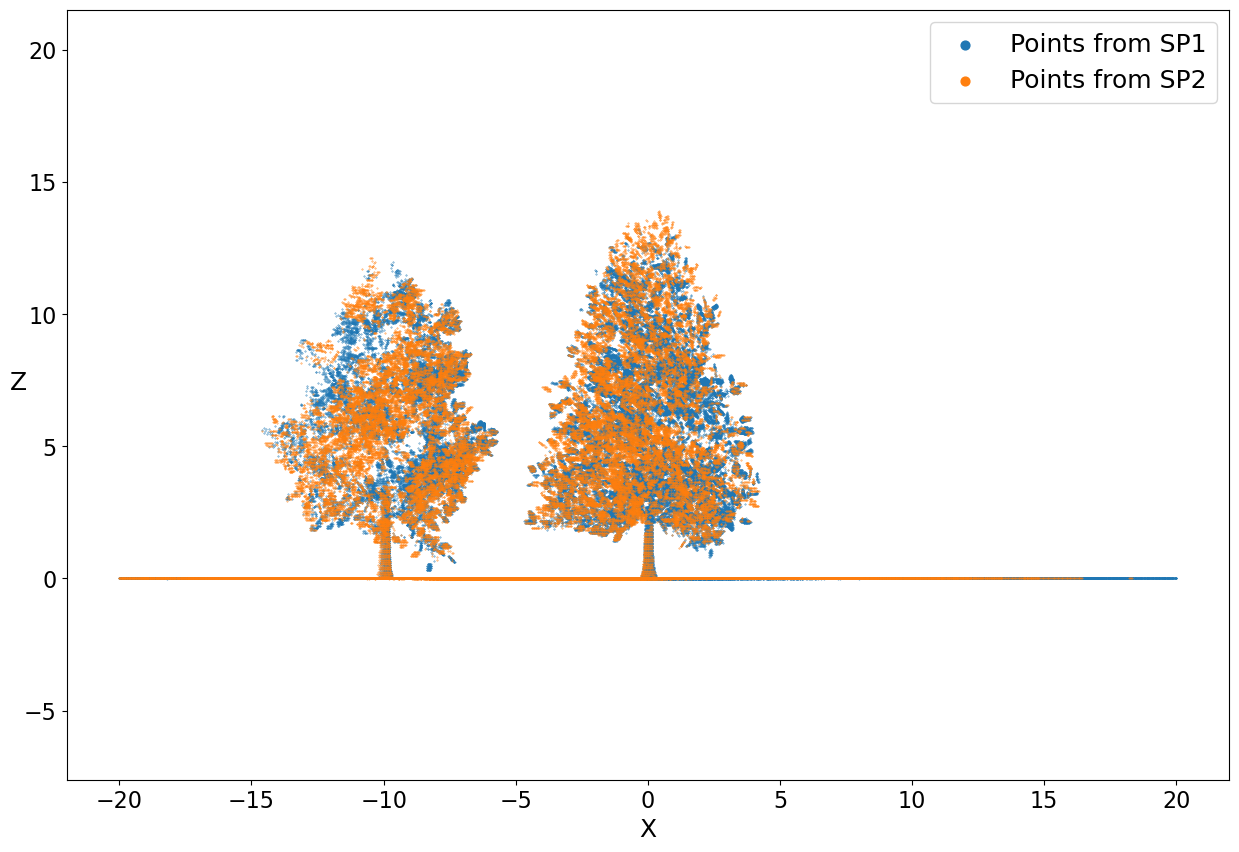

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir(r"data/surveys/demo/tls_arbaro_demo.xml")

print("Loading points from", output_path)
SP1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
SP2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')

# discard points outside of [-20, -20] to [20, 20] (x, y)
SP1 = SP1[(SP1[:, 0] > -20) & (SP1[:, 1] > -20) & (SP1[:, 0] < 20) & (SP1[:, 1] < 20), :]
SP2 = SP2[(SP2[:, 0] > -20) & (SP2[:, 1] > -20) & (SP2[:, 0] < 20) & (SP2[:, 1] < 20), :]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(SP1[:, 0], SP1[:, 2], s=0.1, label="Points from SP1") # select X and Z coordinates
ax.scatter(SP2[:, 0], SP2[:, 2], s=0.1, label="Points from SP2")
plt.axis('equal')
ax.tick_params(labelsize=16)
plt.xlabel('X', fontsize=18)
plt.ylabel('Z', fontsize=18, rotation=0)
plt.legend(fontsize=18, markerscale=20)
plt.show()